In [1]:
from typing_extensions import dataclass_transform

# Gerekli kütüphaneler çağırıldı
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Veri seti okundu
df = pd.read_excel("Enhanced_Climate_Data_Strong_Correlations.xlsx")
df

,Year,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
0,1990,Argentina,Barley,18.600000,848.140000,19.040000,1.473322,7.666667,20.406667,51.610000,36.933333,417.362489
1,1990,Argentina,Coffee,13.516667,1560.153333,15.376667,1.726297,7.333333,17.013333,48.576667,68.653333,606.197926
2,1990,Argentina,Corn,18.110000,1306.180000,12.993333,2.672391,5.666667,39.413333,71.926667,55.003333,861.858032
3,1990,Argentina,Cotton,18.295000,1707.450000,23.760000,2.868836,3.000000,37.895000,36.615000,75.125000,874.440183
4,1990,Argentina,Fruits,20.880000,1566.700000,19.020000,2.482169,8.250000,18.950000,57.372500,65.570000,762.391367
...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2024,USA,Rice,22.164000,1199.048000,23.534000,2.838184,5.200000,11.388000,59.418000,63.456000,871.219067
3287,2024,USA,Soybeans,16.376667,1093.873333,14.440000,2.589047,4.000000,20.090000,63.503333,74.373333,834.326179
3288,2024,USA,Sugarcane,16.877500,1777.680000,12.147500,1.907241,6.250000,19.982500,35.865000,71.882500,568.379907
3289,2024,USA,Vegetables,10.810000,1305.895000,21.425000,1.416919,3.500000,38.375000,84.490000,42.755000,466.438486


In [2]:
print("Veri Seti Boyutu:", df.shape)

Veri Seti Boyutu: (3291, 12)


In [3]:
# Veri setinin ilk 10 satırı yazdırıldı
df.head(10)

,Year,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
0,1990,Argentina,Barley,18.600000,848.140000,19.040000,1.473322,7.666667,20.406667,51.610000,36.933333,417.362489
1,1990,Argentina,Coffee,13.516667,1560.153333,15.376667,1.726297,7.333333,17.013333,48.576667,68.653333,606.197926
2,1990,Argentina,Corn,18.110000,1306.180000,12.993333,2.672391,5.666667,39.413333,71.926667,55.003333,861.858032
3,1990,Argentina,Cotton,18.295000,1707.450000,23.760000,2.868836,3.000000,37.895000,36.615000,75.125000,874.440183
4,1990,Argentina,Fruits,20.880000,1566.700000,19.020000,2.482169,8.250000,18.950000,57.372500,65.570000,762.391367
5,1990,Argentina,Rice,25.250000,1540.486667,14.126667,2.567998,5.333333,42.223333,18.710000,72.513333,870.691213
6,1990,Argentina,Soybeans,16.675000,1737.825000,1.830000,1.791155,8.000000,28.515000,10.675000,71.130000,558.981308
7,1990,Argentina,Sugarcane,15.020000,2874.400000,22.560000,5.243874,0.000000,24.620000,68.720000,78.900000,1588.561698
8,1990,Argentina,Vegetables,12.175000,980.680000,15.940000,1.340465,4.500000,16.775000,43.440000,65.810000,486.259085
9,1990,Argentina,Wheat,10.755000,867.305000,18.350000,2.084882,4.000000,16.875000,75.195000,75.215000,685.621157


In [4]:
# Veri setinin son 10 satırı yazdırıldı
df.tail(10)

,Year,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
3281,2024,USA,Barley,16.021429,1988.292857,18.005714,2.480753,5.000000,31.957143,42.687143,77.218571,858.516010
3282,2024,USA,Coffee,15.725714,1562.004286,15.331429,2.119892,4.857143,41.422857,59.892857,56.945714,671.874533
3283,2024,USA,Corn,6.370000,1585.256667,15.653333,2.140866,3.333333,23.200000,92.220000,55.406667,697.022462
3284,2024,USA,Cotton,10.740000,958.310000,21.263333,1.524596,4.000000,21.230000,46.933333,49.480000,542.058975
3285,2024,USA,Fruits,11.200000,2647.110000,16.280000,1.974857,9.000000,34.810000,87.340000,68.900000,624.202153
3286,2024,USA,Rice,22.164000,1199.048000,23.534000,2.838184,5.200000,11.388000,59.418000,63.456000,871.219067
3287,2024,USA,Soybeans,16.376667,1093.873333,14.440000,2.589047,4.000000,20.090000,63.503333,74.373333,834.326179
3288,2024,USA,Sugarcane,16.877500,1777.680000,12.147500,1.907241,6.250000,19.982500,35.865000,71.882500,568.379907
3289,2024,USA,Vegetables,10.810000,1305.895000,21.425000,1.416919,3.500000,38.375000,84.490000,42.755000,466.438486
3290,2024,USA,Wheat,10.205000,1751.595000,15.510000,1.874048,7.500000,41.565000,44.850000,67.390000,619.565590


In [5]:
# Veri setine genel bakış
print("VERİ SETİ BİLGİLERİ")

print(f" Satır sayısı: {df.shape[0]}")
print(f" Sütun sayısı: {df.shape[1]}")
print("\n Sütun İsimleri:\n", df.columns.tolist())

VERİ SETİ BİLGİLERİ
 Satır sayısı: 3291
 Sütun sayısı: 12

 Sütun İsimleri:
 ['Year', 'Country', 'Crop_Type', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']


In [6]:
print("Veri Türleri:")
print(df.dtypes)

Veri Türleri:
Year                             int64
Country                         object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events         float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Economic_Impact_Million_USD    float64
dtype: object


In [7]:
print("Eksik Değer Sayısı:")
print(df.isnull().sum())

Eksik Değer Sayısı:
Year                           0
Country                        0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Economic_Impact_Million_USD    0
dtype: int64


In [8]:
numerics = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricals = df.select_dtypes(include='object').columns.tolist()

print(" Sayısal Sütunlar:", numerics)
print(" Kategorik Sütunlar:", categoricals)

 Sayısal Sütunlar: ['Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']
 Kategorik Sütunlar: ['Country', 'Crop_Type']


In [9]:
# Değişkenler ve anlamları
degiskenler = {
    "Year": "Veriye ait yılı",
    "Country": "Ülke adı",
    "Crop_Type": "Mahsul türü",
    "Average_Temperature_C": "Ortalama sıcaklık (Santigrat)",
    "Total_Precipitation_mm": "Toplam yağış (mm)",
    "CO2_Emissions_MT": "CO2 emisyonları (Metrik Ton)",
    "Crop_Yield_MT_per_HA": "Mahsul verimi (Ton/hektar)",
    "Extreme_Weather_Events": "Aşırı hava olay sayısı",
    "Pesticide_Use_KG_per_HA": "Pestisit kullanımı (kg/hektar)",
    "Fertilizer_Use_KG_per_HA": "Gübre kullanımı (kg/hektar)",
    "Soil_Health_Index": "Toprak sağlık endeksi",
    "Economic_Impact_Million_USD": "Ekonomik etki (Milyon USD)",
}

for col, desc in degiskenler.items():
    print(f"{col} : {desc}")

Year : Veriye ait yılı
Country : Ülke adı
Crop_Type : Mahsul türü
Average_Temperature_C : Ortalama sıcaklık (Santigrat)
Total_Precipitation_mm : Toplam yağış (mm)
CO2_Emissions_MT : CO2 emisyonları (Metrik Ton)
Crop_Yield_MT_per_HA : Mahsul verimi (Ton/hektar)
Extreme_Weather_Events : Aşırı hava olay sayısı
Pesticide_Use_KG_per_HA : Pestisit kullanımı (kg/hektar)
Fertilizer_Use_KG_per_HA : Gübre kullanımı (kg/hektar)
Soil_Health_Index : Toprak sağlık endeksi
Economic_Impact_Million_USD : Ekonomik etki (Milyon USD)


Veri Setini Görselleştirme

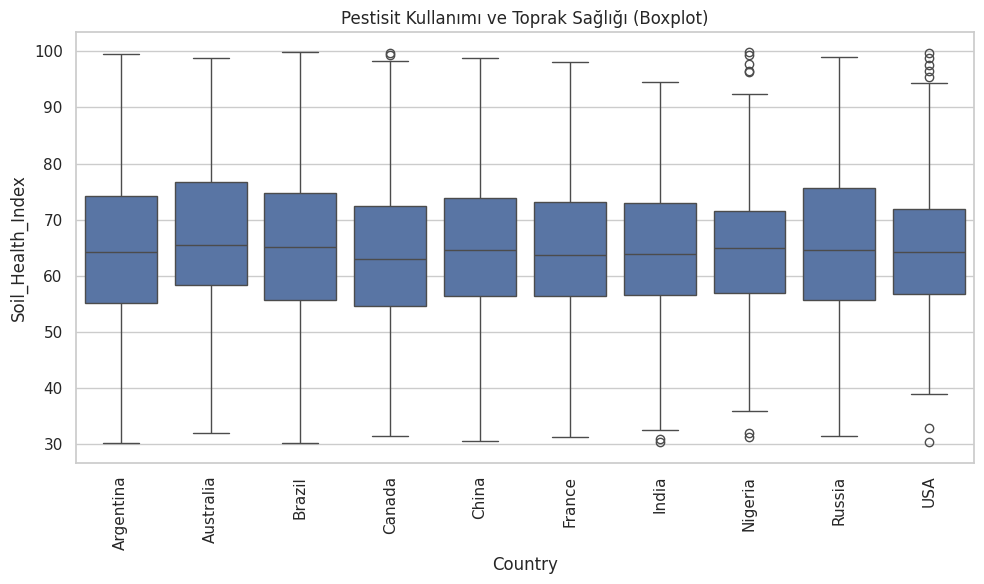

In [10]:

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'  

# 1. Pestisit Kullanımı vs. Toprak Sağlığı
plt.figure()
sns.boxplot(data=df, x="Country", y="Soil_Health_Index")
plt.xticks(rotation=90)
plt.title("Pestisit Kullanımı ve Toprak Sağlığı (Boxplot)")
plt.tight_layout()
plt.savefig("grafik_1_pestisit_toprak_boxplot.png")
plt.show() 
plt.close()

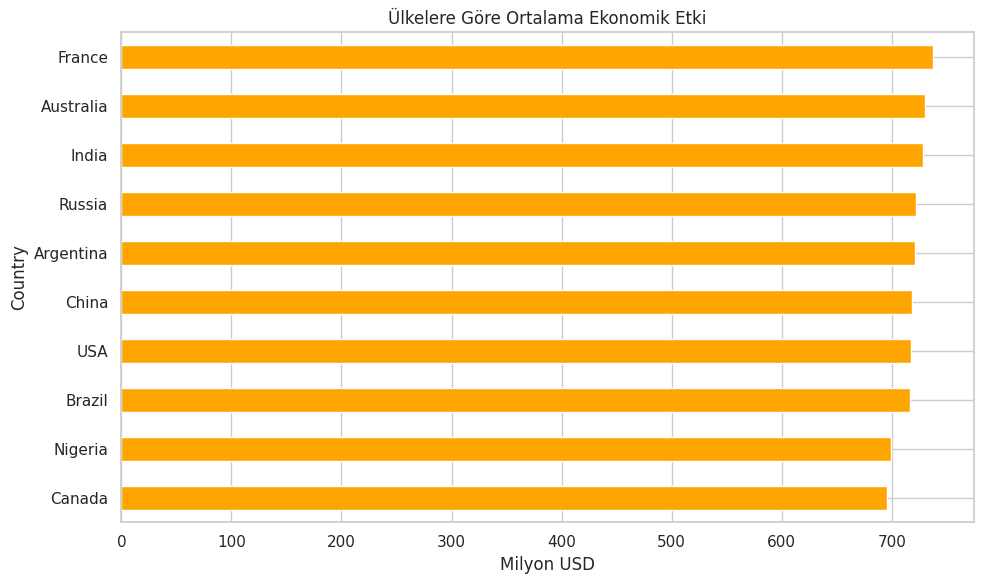

In [11]:
# 2. Ülkelere Göre Ekonomik Etki
plt.figure()
df.groupby("Country")["Economic_Impact_Million_USD"].mean().sort_values().plot(kind="barh", color="orange")
plt.title("Ülkelere Göre Ortalama Ekonomik Etki")
plt.xlabel("Milyon USD")
plt.tight_layout()
plt.savefig("grafik_2_ekonomik_etki_bar.png")
plt.show() 
plt.close()

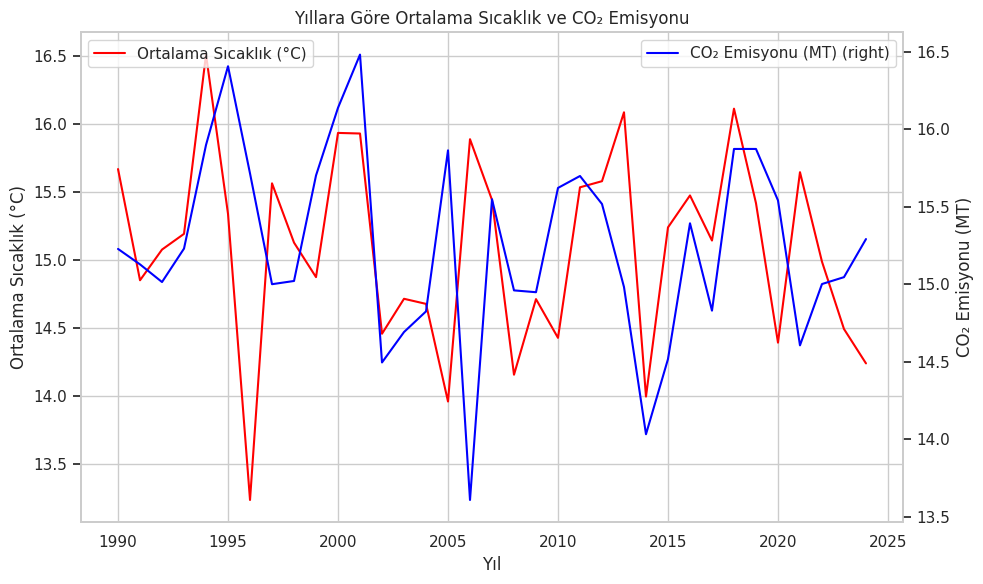

In [12]:
# 3. Yıllara Göre Ortalama Sıcaklık & CO2 Emisyonu (Çift eksen)
plt.figure()
avg_by_year = df.groupby("Year")[["Average_Temperature_C", "CO2_Emissions_MT"]].mean()
ax = avg_by_year["Average_Temperature_C"].plot(label="Ortalama Sıcaklık (°C)", color="red")
avg_by_year["CO2_Emissions_MT"].plot(secondary_y=True, label="CO₂ Emisyonu (MT)", color="blue", ax=ax)
ax.set_title("Yıllara Göre Ortalama Sıcaklık ve CO₂ Emisyonu")
ax.set_xlabel("Yıl")
ax.set_ylabel("Ortalama Sıcaklık (°C)")
ax.right_ax.set_ylabel("CO₂ Emisyonu (MT)")
ax.legend(loc="upper left")
ax.right_ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig("grafik_3_sicaklik_emisyon_cift_eksen.png")
plt.show() 
plt.close()

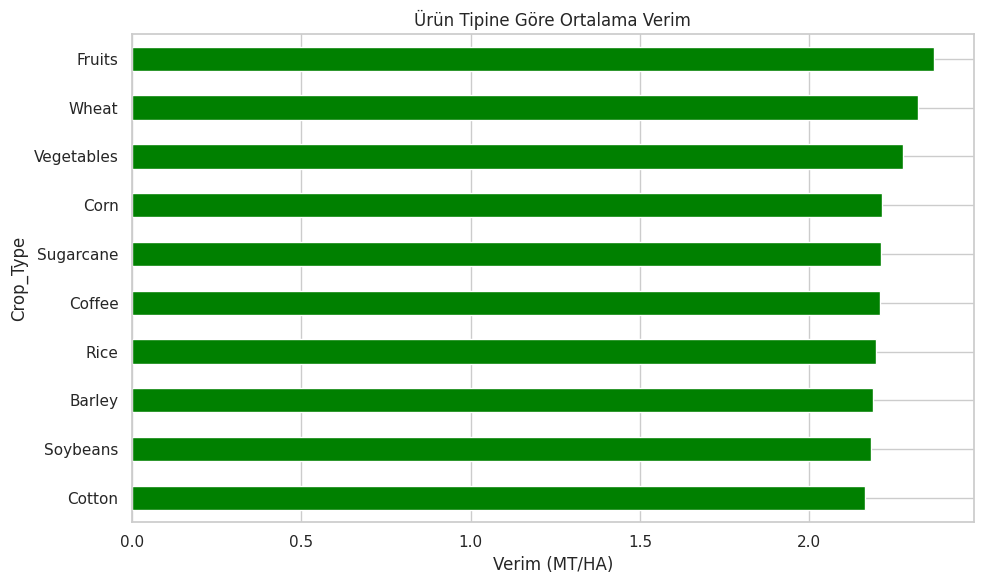

In [13]:
# 4. Ürün Tipine Göre Verim
plt.figure()
df.groupby("Crop_Type")["Crop_Yield_MT_per_HA"].mean().sort_values().plot(kind="barh", color="green")
plt.title("Ürün Tipine Göre Ortalama Verim")
plt.xlabel("Verim (MT/HA)")
plt.tight_layout()
plt.savefig("grafik_4_urun_verim_bar.png")
plt.show() 
plt.close()

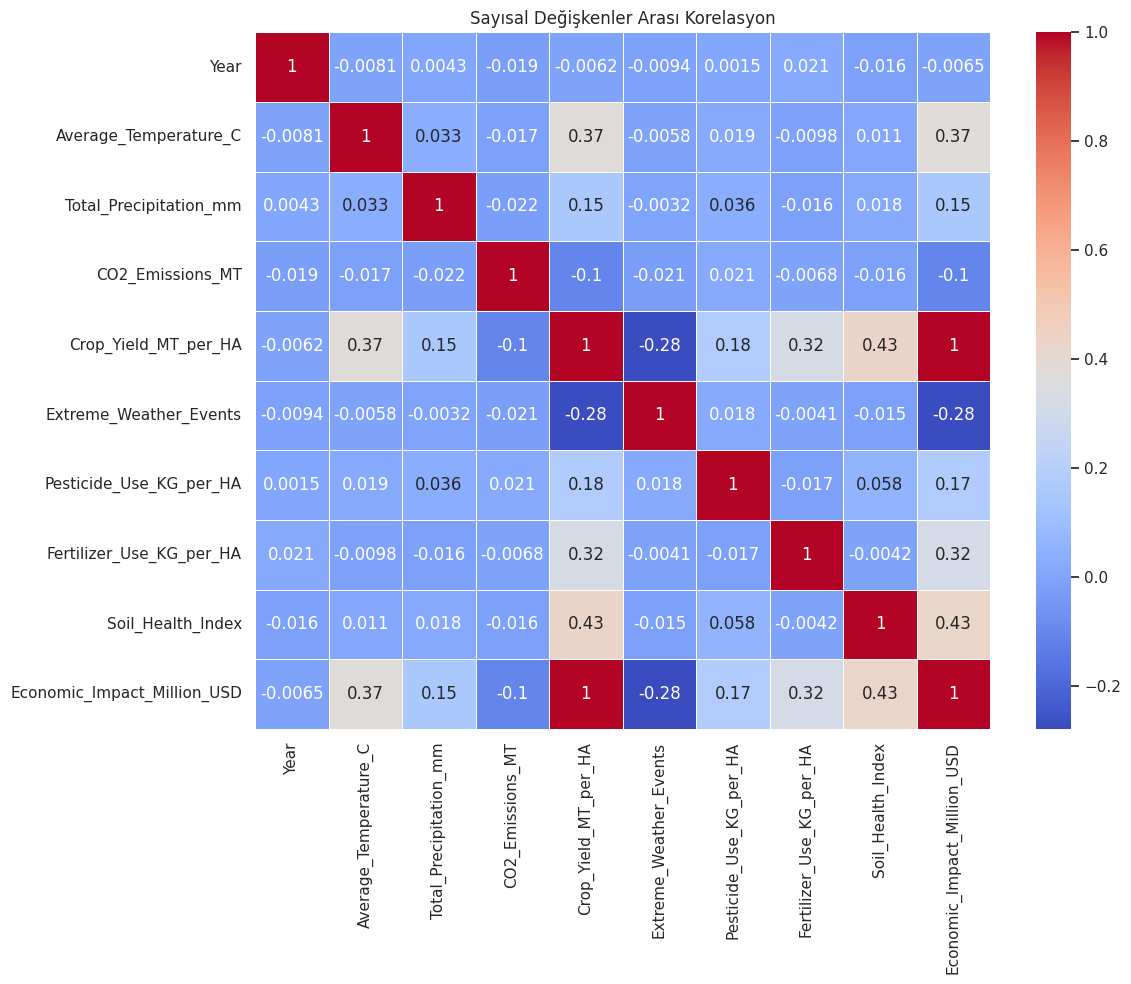

In [14]:
# 5. Korelasyon Isı Haritası
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.tight_layout()
plt.savefig("grafik_5_korelasyon_heatmap.png")
plt.show() 
plt.close()

Korelasyon Analizi

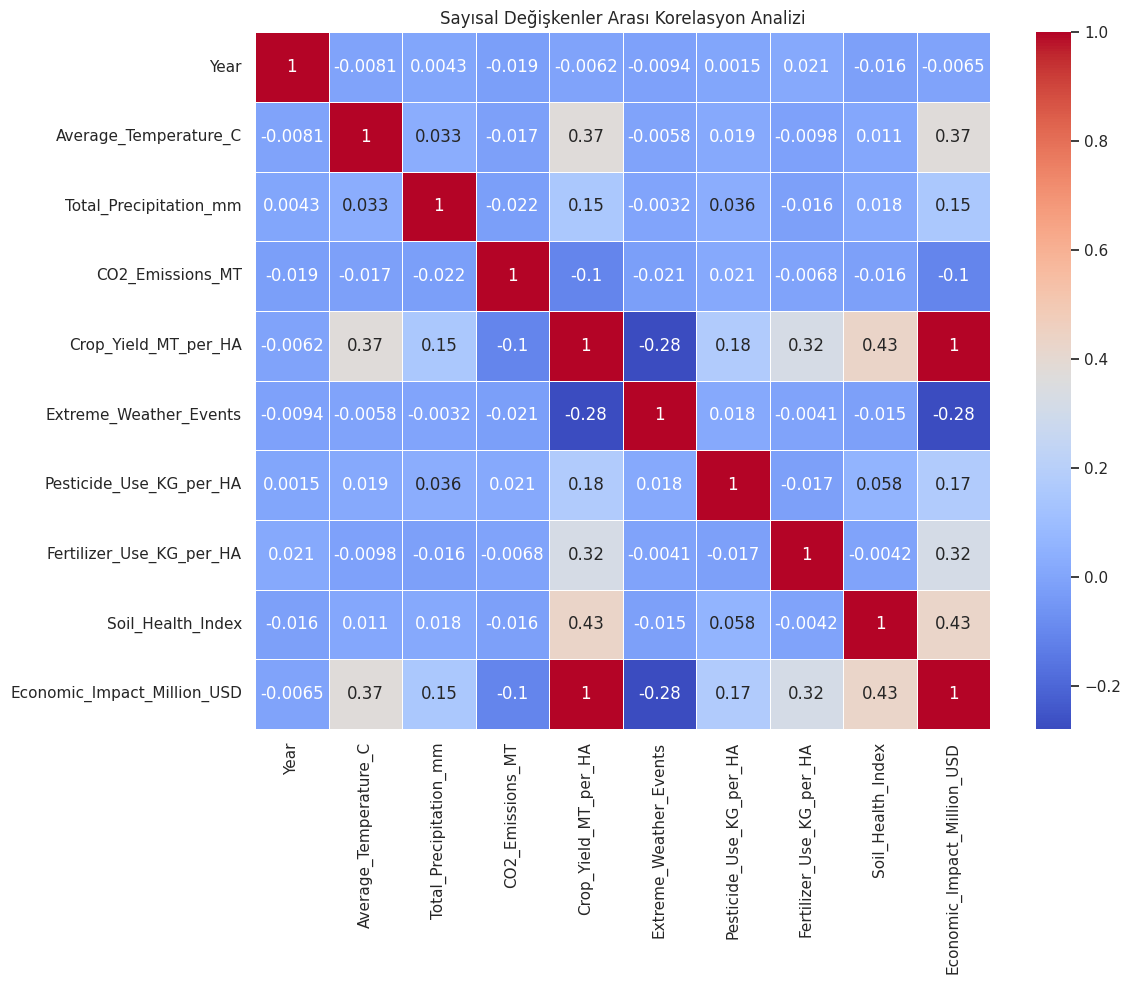


 En Güçlü Pozitif Korelasyonlar:
Crop_Yield_MT_per_HA         Economic_Impact_Million_USD    0.995446
Economic_Impact_Million_USD  Crop_Yield_MT_per_HA           0.995446
Soil_Health_Index            Crop_Yield_MT_per_HA           0.432528
Crop_Yield_MT_per_HA         Soil_Health_Index              0.432528
Economic_Impact_Million_USD  Soil_Health_Index              0.430045
dtype: float64

 En Güçlü Negatif Korelasyonlar:
Extreme_Weather_Events       Crop_Yield_MT_per_HA          -0.278221
Crop_Yield_MT_per_HA         Extreme_Weather_Events        -0.278221
Extreme_Weather_Events       Economic_Impact_Million_USD   -0.277291
Economic_Impact_Million_USD  Extreme_Weather_Events        -0.277291
                             CO2_Emissions_MT              -0.104512
dtype: float64


In [15]:
numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Analizi")
plt.tight_layout()
plt.savefig("grafik_5_korelasyon_heatmap.png")  
plt.show()

print("\n En Güçlü Pozitif Korelasyonlar:")
print(corr_matrix.unstack().sort_values(ascending=False)[len(numeric_df.columns):][:5])

print("\n En Güçlü Negatif Korelasyonlar:")
print(corr_matrix.unstack().sort_values()[:5])

Gözetimli Öğrenme Modeli

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

features = [
    'CO2_Emissions_MT',
    'Average_Temperature_C',
    'Total_Precipitation_mm',
    'Extreme_Weather_Events',
    'Fertilizer_Use_KG_per_HA',
    'Crop_Yield_MT_per_HA' 
]

df = df[features]

Q1 = df['Crop_Yield_MT_per_HA'].quantile(0.25)
Q3 = df['Crop_Yield_MT_per_HA'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Crop_Yield_MT_per_HA'] >= Q1 - 1.5 * IQR) & (df['Crop_Yield_MT_per_HA'] <= Q3 + 1.5 * IQR)]


df = df.dropna()

X = df.drop(columns='Crop_Yield_MT_per_HA')
y = df['Crop_Yield_MT_per_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Modelin Performans Ölçümü

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = knn_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Skoru: {r2:.2f}")

MAE: 0.38
MSE: 0.26
R² Skoru: 0.49


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR MAE:", mean_absolute_error(y_test, y_pred_lr))
print("LR R2:", r2_score(y_test, y_pred_lr))

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
y_pred_rf = rfr.predict(X_test)
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))

LR MAE: 0.42875128814298247
LR R2: 0.3538815550601623
RF MAE: 0.36235110026123163
RF R2: 0.5444009636987241


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, r2_score
print(f"Tuned RF MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Tuned RF R2: {r2_score(y_test, y_pred_rf):.4f}")

Tuned RF MAE: 0.3571
Tuned RF R2: 0.5573


“Hiperparametre optimizasyonu sonrası Random Forest modelinin R² skoru %55.7’ye çıkarıldı. Bu da modelin hedef değişken olan Crop Yield’ın %55’ini açıklayabildiğini gösteriyor. Bu sonuç, iklim değişkenleriyle tarımsal verim arasındaki ilişkinin ölçülebilir olduğunu göstermektedir.”